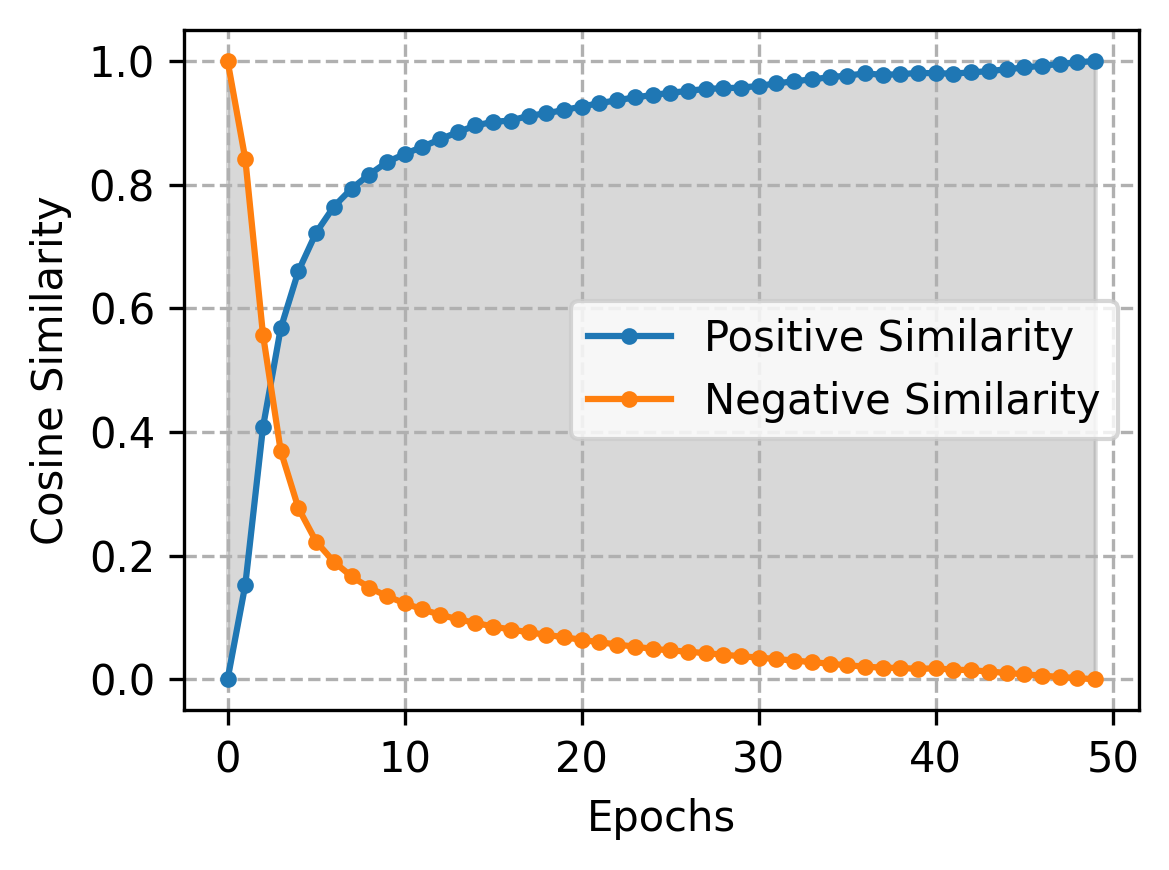

Average Positive Similarity: 0.8739
Average Negative Similarity: 0.1129
Max Positive Similarity: 1.0000
Min Negative Similarity: 0.0000


In [62]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt

# Load the TensorBoard log file
log_path = "/data2/user2/senkang/CP-GuardBench/cpguard/runs/Sep13_17-21-38_cs741e/events.out.tfevents.1726219298.cs741e.1971801.0"
ea = event_accumulator.EventAccumulator(log_path)
ea.Reload()

# Extract similarity data
positive_similarity = ea.Scalars('Similarity/positive')
negative_similarity = ea.Scalars('Similarity/negative')

# Prepare data for plotting
steps = [s.step for s in positive_similarity]
pos_values = [s.value for s in positive_similarity]
neg_values = [s.value for s in negative_similarity]

# Regularize pos_values and neg_values to 0-1 range, respectively
pos_min, pos_max = min(pos_values), max(pos_values)
neg_min, neg_max = min(neg_values), max(neg_values)
pos_values = [(v - pos_min) / (pos_max - pos_min) for v in pos_values]
neg_values = [(v - neg_min) / (neg_max - neg_min) for v in neg_values]

# Create the plot
plt.figure(figsize=(4, 3), dpi=300)
plt.plot(steps, pos_values, label='Positive Similarity', marker='.' )
plt.plot(steps, neg_values, label='Negative Similarity', marker='.' )
plt.fill_between(steps, pos_values, neg_values, color='gray', alpha=0.3)
plt.xlabel('Epochs')
plt.ylabel('Cosine Similarity')
# plt.title('Positive and Negative Similarities Over Time')
plt.legend()
plt.grid(linestyle='--', zorder=0)
plt.tight_layout()


plt.savefig('cont_similarity.png')
# Show the plot
plt.show()


# Print some statistics
print(f"Average Positive Similarity: {sum(pos_values) / len(pos_values):.4f}")
print(f"Average Negative Similarity: {sum(neg_values) / len(neg_values):.4f}")
print(f"Max Positive Similarity: {max(pos_values):.4f}")
print(f"Min Negative Similarity: {min(neg_values):.4f}")


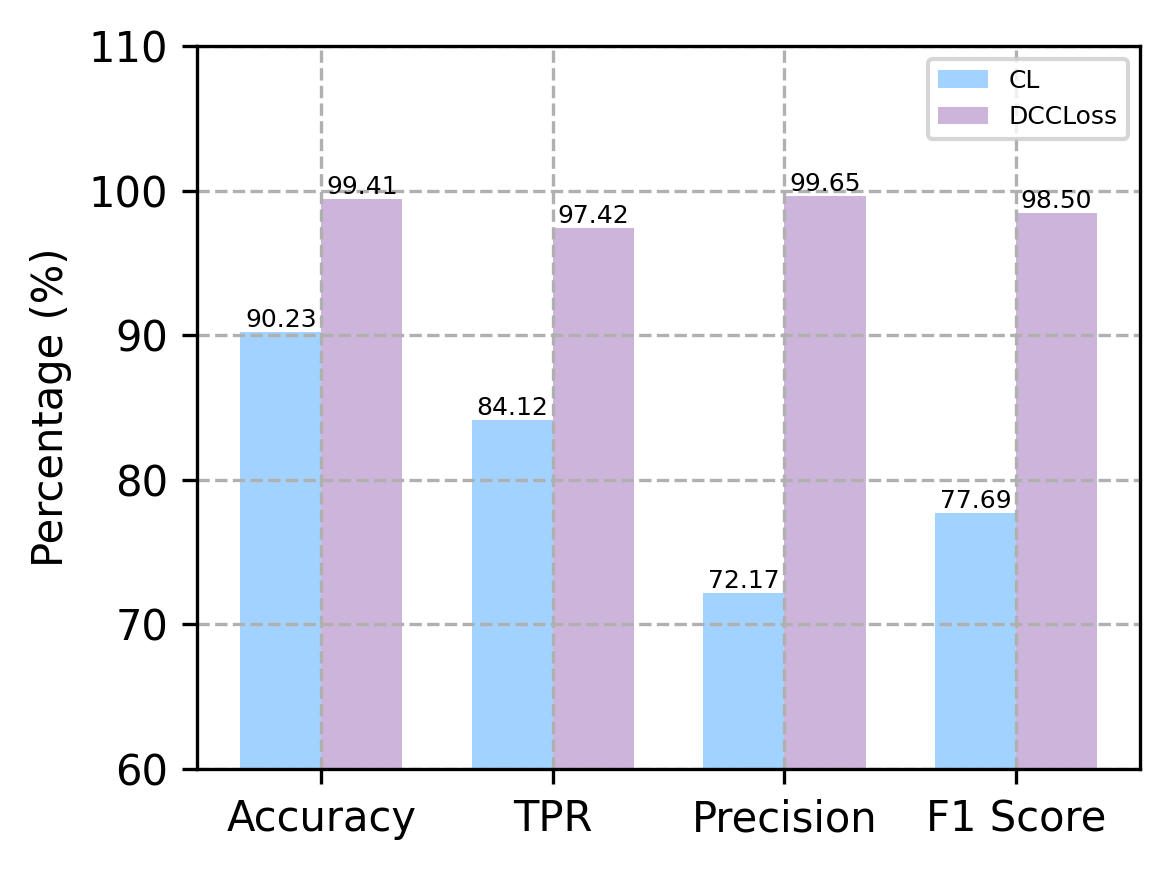

In [10]:
import matplotlib.pyplot as plt


wo_cont = [90.23, 84.12, 72.17, 77.69]

# wo_cont = [98.08, 97.07, 93.45, 95.29]

w_cont = [99.41, 97.42, 99.65, 98.50]

x_labels = ["Accuracy", 'TPR', 'Precision', 'F1 Score']

# 设置柱状图的宽度和位置
bar_width = 0.35
r1 = range(len(wo_cont))
r2 = [x + bar_width for x in r1]

# 创建柱状图
plt.figure(figsize=(4, 3), dpi=300)
plt.grid(linestyle='--', zorder=0)
plt.bar(r1, wo_cont, width=bar_width, label='CL', color='#a2d2ff')
plt.bar(r2, w_cont, width=bar_width, label='DCCLoss', color='#cdb4db')

# 添加标签和标题
# plt.xlabel('Metrics')
plt.ylabel('Percentage (%)')
# plt.title('Comparison of Metrics With and Without Contrastive Learning')
plt.xticks([r + bar_width/2 for r in range(len(wo_cont))], x_labels)

# 设置y轴范围为0-110
plt.ylim(60, 110)

# 添加图例
plt.legend(fontsize=6)


# 显示数值
for i, v in enumerate(wo_cont):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=6)
for i, v in enumerate(w_cont):
    plt.text(i + bar_width, v, f'{v:.2f}', ha='center', va='bottom', fontsize=6)

# 调整布局并显示图形
plt.tight_layout()


plt.savefig('DCCLoss_ablation_bar2.png')

plt.show()



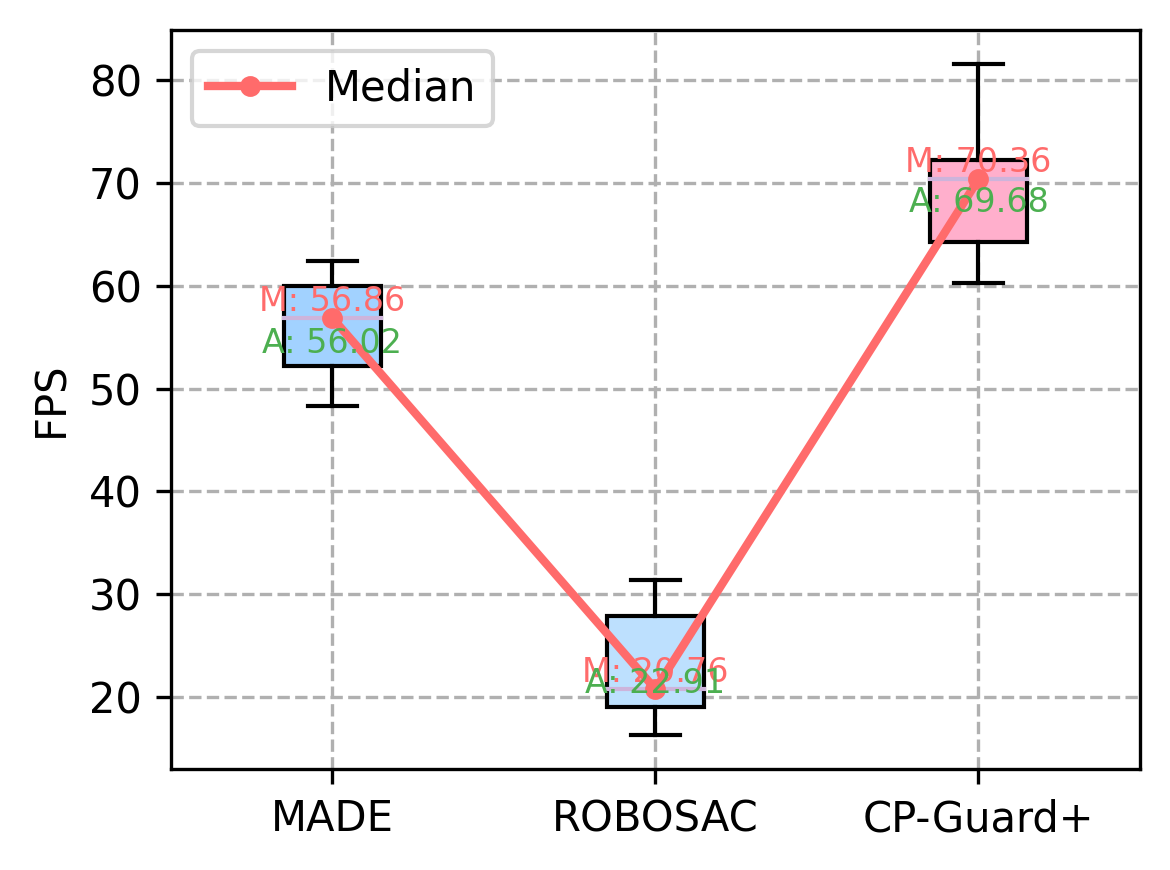

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the box plot
data = [60.26, 72.26, 64.27, 81.61, 71.68, 69.38, 73.31, 70.36, 63.99]
data2 = [48.32, 53.15, 58.79, 62.41, 51.88, 49.76, 61.23, 54.92, 59.67, 60.05]
data3 = [19.85, 24.63, 28.97, 21.09, 18.76, 17.54, 16.28, 30.15, 20.43, 31.42]

# Create the box plot
plt.figure(figsize=(4, 3), dpi=300)
plt.grid(linestyle='--', zorder=0)
box = plt.boxplot([data2, data3, data], patch_artist=True, labels=[ 'MADE', 'ROBOSAC', 'CP-Guard+'])

# Customize the box plot
plt.ylabel('FPS')

# Color the boxes
colors = ['#a2d2ff', '#bde0fe', '#ffafcc']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
# Set color for median lines
for median in box['medians']:
    median.set_color('#cdb4db')

# Add line plot for median values
medians = [np.median(d) for d in [data2, data3, data]]  # Changed order to match boxplot
plt.plot(range(1, len(medians) + 1), medians, color='#ff6b6b', marker='.', linestyle='-', linewidth=2, markersize=8, zorder=3, label='Median')

# Calculate averages (but don't plot them)
averages = [np.mean(d) for d in [data2, data3, data]]

# Add labels for median and average values
for i, (median, average) in enumerate(zip(medians, averages)):
    plt.text(i + 1, median, f'M: {median:.2f}', ha='center', va='bottom', fontsize=8, color='#ff6b6b')
    plt.text(i + 1, average, f'A: {average:.2f}', ha='center', va='top', fontsize=8, color='#4CAF50')

# Add legend
plt.legend()

# Adjust layout and save
plt.tight_layout()
plt.savefig('metrics_box_plot_comparison.png')
plt.show()